# Example 1: Plot the log likelihood for population parameters and some others

* Draw 10 samples of size 3 each from an univariate normal distribution with $N(µ = 2.0, σ^2 = 0.5)$

* Compute the log likelihood function for a range of µ comprising the µ of the population

* Do the same for 10 samples of size 30

* Plot all 20 log likelihood functions on top of each other!

* Does the maximum of the log likelihood functions is always at µ?

* How is the shape changing with increasing sample size?

In [17]:
n <- 3
x <- matrix(rnorm(n, 2.0, sqrt(0.5/n)), 10, n)
t <- rowMeans(x) + runif(100, -3, 3)
plot(...)
for(i in 2:10){
    l <- rowSums(-log(sqrt(sqrt(0.5)))-log(sqrt(2*pi))-(x-t)^2)
    lines(t,l)
}
n <- 30
...

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


# Example 2: Derive an estimator for µ and σ of a normal distribution

$$L(x_k|_{\mu, \sigma})=\prod_{k=1}^k \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\frac{(x_k-\mu)^2}{\sigma^2}}$$
$$l=\ln L = \sum_{k=1}^K\{-\ln\sigma-\ln{\sqrt{2\pi}}-\frac{1}{2}\frac{(x_k-\mu)^2}{\sigma^2}\}$$
$\frac{dl}{d\mu}=\sum_k \frac{x_k-\mu}{\sigma^2} = 0 $, $\frac{dl}{d\sigma}=\sum\{-\frac{1}{\sigma}+\frac{1}{\sigma^3}(x_k-\hat{\mu})^2\}=0$

We get the estimator of mean: $\hat{\mu}=\frac{1}{k} \sum{x_k}$, the estimator of standard deviation: $\hat{\sigma}=\sqrt{\frac{1}{k}\sum(x_k-\mu)^2}$

1/k instead of 1/(k-1) => estimator can be unbiased, asymtotically unbiased for large size of samples

estimate variance $\widehat{\sigma^2}$: $l=\ln L = \sum_{k=1}^K\{-\frac{1}{2}\ln{\sigma^2}-\ln{\sqrt{2\pi}}-\frac{1}{2}\frac{(x_k-\mu)^2}{\sigma^2}\}$

important property: $\widehat{\phi(\theta)}=\phi(\hat{\theta})$

# Example 3: Derive an estimator for expectation value λ of a Poisson distribution

$$L(x_k|_{\mu, \sigma})=\prod_{i=1}^n \frac{e^{-\lambda}\lambda^{r_i}}{r_i!}$$
$$l=\ln L=\sum_{i=1}^n\{-\lambda+r_i\ln\lambda-\ln{(r_i!)}\}$$
$$\frac{dl}{d\lambda}=-n+\frac{\sum r_i}{\lambda}=0$$
$$\hat\lambda=\frac{1}{n}\sum_{i=1}^n r_i$$
Although for poisson distribution $\lambda$ is also the variance, here the estimator we get is the mean

# Bootstrap MC (establishing confidence intervals)

N: i.i.d(independent identically distributed) "point"(order of these variables doesn't matter)

We assume $a_{(0)}$ well reprensents the real distribution

Now we generate artificially new samples of the same size by drawing from the old samples with replacement. Repeat this procedure for $B$ times.

$(a_{(0)}-a_{true})$"distrubuted as"$(a_{(i)}-a_{(0)})$

$B\gtrsim N(\ln N)^2$

Example:

Standard popolution of (sample - reference value) 
Population:         24.68883 
Bootstrap samples:  24.10064 


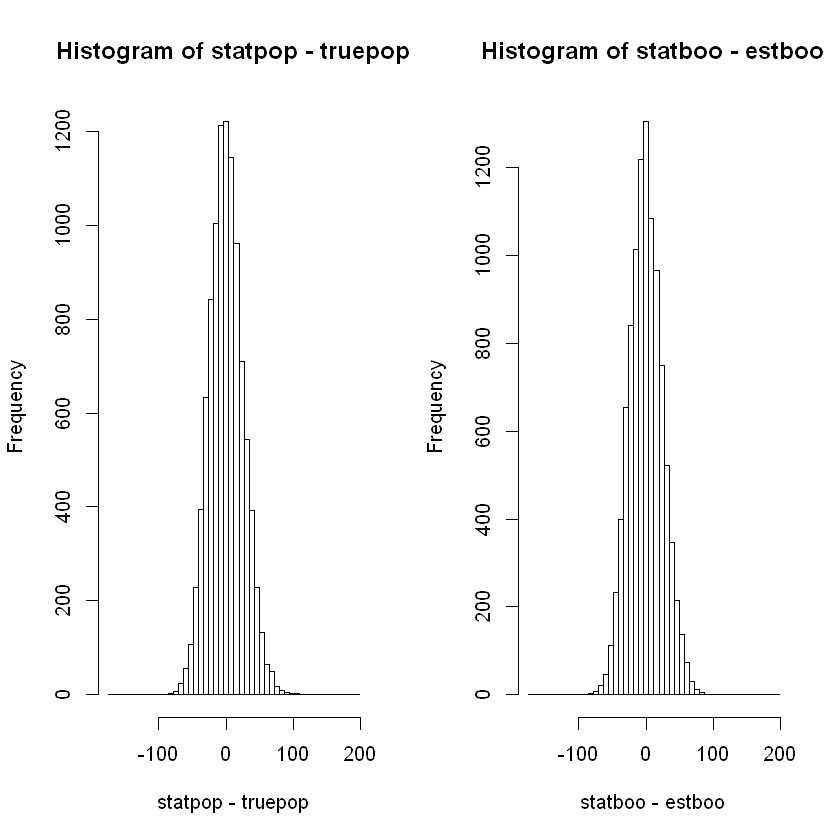

In [28]:
statistic <- function(x) {
#  r <- rowMeans(x)    # mean
  r <- rowSums( x^2 ) # sum of squares 
  return(r)
}

nmc   <- 10000
N     <- 300
apop    <- matrix(rnorm(nmc*N, 0, 1),nmc,N)
statpop <- statistic(apop)
truepop <- N # sum of squares
#truepop <- 0.0
 
#k <- floor((log(N))^2 * N)
k <- nmc

a0      <- rnorm(N, 0, 1)
aboo    <- matrix(sample(a0,N*k,replace=TRUE), k, N)

statboo <- statistic(aboo)
estboo  <- statistic(matrix(a0,1,N))

cat("Standard popolution of (sample - reference value)", "\n")
cat("Population:        ", sd(statpop - truepop), "\n")
cat("Bootstrap samples: ", sd(statboo - estboo), "\n")
par(mfrow=c(1,2))
xx <- range(statboo-estboo)
xx <- mean(xx)+ 2.0*(xx-mean(xx))
xx <- seq(xx[1],xx[2], (xx[2]-xx[1])/50.0)
hist(statpop-truepop,breaks=xx)
hist(statboo-estboo, breaks=xx)

# Error estimation using the Bootstrap method

In the file xlum_obs.txt you will find measurements of the X-ray flux emitted by 40 stars in the Orion nebula (in logarithmic units). Calculate the mean and median of logLX (referred to as $L_X$ from here on).

* a. The standard deviation of the mean $<L_X>$ of $N = 40$ observations can be derived analytically from the standard expression $sd(<L_X>)=\frac{sd(L_X)}{\sqrt N}$. But here we want to use use the bootstrap method to calculate the standard deviation explicitly from the means of many observation sets. Since we only have this one sample of 40 stars and cannot easily repeat the “experiment”, we are going to create $B$ simulated observations. For this purpose, write a function that creates random bootstrap samples from the original observed data set (i.,e. each sample includes the same number of 40 observations, but may contain multiple instances of some stars). Save the means of the samples in an array and directly calculate their standard deviations for a range of bootstrap sample sizes B from ∼ 10 to at least several 100.
  
  Comparing the standard deviations thus obtained, and the analytical value, what is a reasonable value of B to obtain a good estimate of the actual error?

In [60]:
Orion <- read.table("xlum_obs.txt", header=TRUE)
logLX <- Orion[,4]
sd_mean <- sd(logLX)/sqrt(length(logLX))
sd_mean
lalala <- function(x, q){
    N <- length(x)
    for(n in seq(10, 1000, 50)){
        bootstrap <- matrix(sample(x, N*n, replace=TRUE), n, N)
        means <- apply(bootstrap, 1, mean, trim=q)
        cat("sd(", n, "samples) =", sd(means),"\n")
        #cat("bias to sd_mean = ", sd(means)-sd_mean, "\n")
}
}
lalala(logLX, 0)
# could create a plot out of it

[1] 0.2665619

sd( 10 samples) = 0.1522242 
sd( 60 samples) = 0.2681189 
sd( 110 samples) = 0.2684217 
sd( 160 samples) = 0.2377551 
sd( 210 samples) = 0.2735336 
sd( 260 samples) = 0.264952 
sd( 310 samples) = 0.2749997 
sd( 360 samples) = 0.2789913 
sd( 410 samples) = 0.2633486 
sd( 460 samples) = 0.2642767 
sd( 510 samples) = 0.2542297 
sd( 560 samples) = 0.2544971 
sd( 610 samples) = 0.2597093 
sd( 660 samples) = 0.2670975 
sd( 710 samples) = 0.2616405 
sd( 760 samples) = 0.267312 
sd( 810 samples) = 0.2680851 
sd( 860 samples) = 0.2683541 
sd( 910 samples) = 0.264437 
sd( 960 samples) = 0.2523832 


* b. Next we are applying the bootstrap method to estimate the error of another estimator, which cannot be derived analytically. Consider the **n% trimmed mean** $<L_X>\{p\}$ as the mean of all data points excluding both the $(n = 100 p)%$ highest and lowest values. Since this quantity is only sampling the central parts of the distribution, the above equation for the standard deviation of the mean does not apply. 
  
  Create a function to calculate the $10–40%$ trimmed means, i.e. $<L_X>\{0.1\}$, $<L_X>\{0.2\}$, $<L_X>\{0.3\}$, $<L_X>\{0.4\}$. 
  
  Apply the bootstrap procedure on these means, using a robust value of B as found in the first part, and calculate their standard deviations. Have a look at the documentation mean() for getting trimmed means.

* c. Now test the validity of the bootstrap method by calculating the error of the trimmed means from a sample of real data sets. Fortunately, we could now obtain a full catalogue of over 400 observations of stars in the Orion Nebula Cluster. Read these in from the file xlum_core.txt. Then select a number of observation subsets of 40 (unique) stars each from this sample. You may consider the correlation of the catalogue numbers COUP and the celestial coordinates RAJ2000, DEJ2000 with logLX to check if you can simply select the stars by number or coordinate, or you can devise a function to randomly draw your subsamples. 

  Calculate the means and the four trimmed means and their errors from this set of subsamples, and plot them in comparison with the errors derived from bootstrapping in the previous part. 
  
  A useful application of the truncated mean are non-normally distributed data sets, e. g. samples with extended tails or outliers. Does any of the truncated means produce a more accurate measurement than the plain mean for this data set?

In [58]:
Orion_full <- read.table("xlum_core.txt", header=TRUE)
logLX_40 <- sample(Orion_full[,4], 40)
logLX_40

[1] 29.5576 27.6675 29.8676 29.6876 28.0539 29.5676 27.8671 29.6876 31.6432
[10] 30.2376 29.7976 28.7376 29.7576 29.1176 30.0876 29.0676 28.9276 28.9676
[19] 29.3676 31.0217 29.6876 28.6676 29.7076 30.0876 29.0076 29.2776 29.5076
[28] 29.8876 29.0176 28.4376 32.1898 28.9376 28.6576 32.4670 27.2009 28.9776
[37] 29.3876 28.8076 29.2476 31.3773